# Cis-eQTL Colocalization

**Created**: 26 March 2022

## Environment

In [1]:
library(tidyverse)
library(data.table)
library(coloc)

setwd("~/eQTL_pQTL_Characterization/")

source("01_Colocalization/scripts/utils/ggplot_theme.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


This is coloc version 5.1.1



## Load Summary Information

Load summary statistics from conditional analysis performed using COJO. Only use cis-eQTL that have the same lead eSNP.

In [2]:
cis.eqtl.conditional <- readRDS("/nfs/users/nfs_n/nm18/gains_team282/eqtl/cisresults/conditionalanalysis/conditional_eQTL_results_final.rds")

In [3]:
overlap.cis.eqtl <- cis.eqtl.conditional %>%
    dplyr::group_by(SNP) %>%
    dplyr::summarize(N.eQTL = n()) %>%
    dplyr::filter(N.eQTL > 1)

In [4]:
cis.eqtl.sets <- cis.eqtl.conditional %>%
    dplyr::filter(SNP %in% overlap.cis.eqtl$SNP) %>%
    dplyr::arrange(SNP) %>%
    with(., split(., SNP))

In [5]:
ids <- unlist(lapply(cis.eqtl.sets, function(x) { paste0(x$Gene, "-", x$Number) }))

In [6]:
cis.eqtl.summary <- do.call(rbind, lapply(1:22, function(chr) {
    fread(paste0("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/cis_eqtl/conditional_effects/LD/chr", chr, "_conditional_cis_eQTL_summary_statistics.tsv")) %>%
        as.data.frame() %>%
        dplyr::mutate(ID=paste0(Gene, "-", Signal)) %>%
        dplyr::filter(ID %in% ids)
}))

In [7]:
head(cis.eqtl.summary)

,Gene,Signal,Chr,SNP,Position,Beta,SE,P_Value,ID
,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000008130,1,1,rs1039063,2350539,0.006760311,0.008101087,0.404103310,ENSG00000008130-1
2,ENSG00000008130,1,1,rs1039064,2350540,-0.009732757,0.011291941,0.388893634,ENSG00000008130-1
3,ENSG00000008130,1,1,rs10399762,1874867,0.048780079,0.016281285,0.002933786,ENSG00000008130-1
4,ENSG00000008130,1,1,rs1040231,2107797,0.030146085,0.012552940,0.016699456,ENSG00000008130-1
5,ENSG00000008130,1,1,rs10449892,1319907,-0.027878728,0.027960376,0.318897193,ENSG00000008130-1
6,ENSG00000008130,1,1,rs10465242,951408,-0.008343425,0.013934597,0.549380611,ENSG00000008130-1


In [8]:
# Example with HIF1A
hif1a = "ENSG00000100644"

hif1a.summary <- fread("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/cis_eqtl/conditional_effects/LD/chr14_conditional_cis_eQTL_summary_statistics.tsv") %>%
    as.data.frame() %>%
    dplyr::filter(Gene == hif1a)

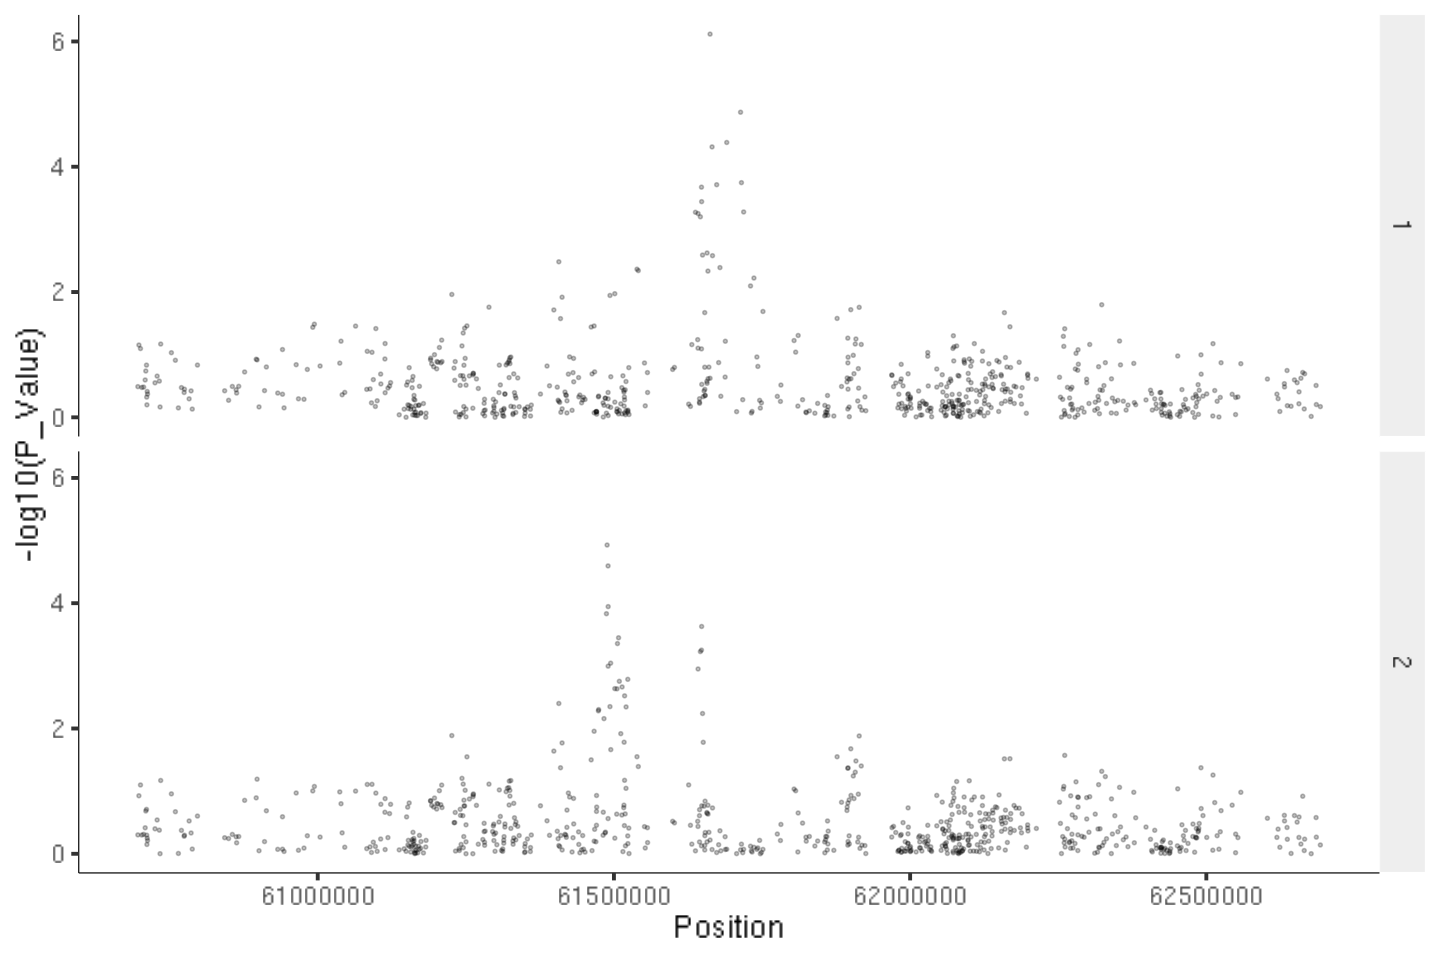

In [9]:
options(repr.plot.width=12, repr.plot.height=8)

ggplot(hif1a.summary) +
    geom_point(aes(x=Position, y=-log10(P_Value)), alpha=0.25, size=0.5) +
    facet_grid(Signal ~ .) +
    ggplot_theme

Split summary statistics by locus.

In [10]:
cis.eqtl.loci <- split(cis.eqtl.summary, cis.eqtl.summary$ID)

## Load Gene and Protein Expression

In [11]:
gene.exp <- read.table("/lustre/scratch119/humgen/projects/gains_team282/eqtl/data/logcpm_864_20412_hla.txt")
gene.exp <- t(gene.exp)
rownames(gene.exp) <- gsub("^GA", "", rownames(gene.exp))

In [12]:
head(gene.exp)

,ENSG00000230521,ENSG00000225864,ENSG00000227766,ENSG00000237669,ENSG00000271581,ENSG00000285647,ENSG00000204435,ENSG00000231074,ENSG00000227262,ENSG00000206337,⋯,ENSG00000288253,ENSG00000288302,ENSG00000288349,ENSG00000288393,ENSG00000288398,ENSG00000288538,ENSG00000288559,ENSG00000288562,ENSG00000288573,ENSG00000288582
UK02270173_3,0.6644339,0.9817872,1.2117156,0.6420763,2.474490,0.00000000,3.704888,4.027339,0.06866465,7.318038,⋯,0.5247755,1.3000450,0.5247755,0.92735960,1.133738,1.1337380,0.9457312,0.87079780,0.31467050,2.811486
UK15130120_3,0.5827160,0.4387994,0.3068267,0.6925683,1.331531,0.03379072,4.261280,3.634898,0.25046090,6.369198,⋯,0.5125515,1.7424980,0.4883840,0.06680807,1.860177,0.6496258,0.9264084,0.06680807,0.22143010,3.343063
UK58000006_3,0.4046756,0.6022344,0.6625010,0.9792012,1.831046,0.00000000,3.719682,3.597655,0.00000000,6.837021,⋯,0.2947282,1.5250610,0.6326824,0.66250100,1.315821,1.4755270,1.0258310,0.29472820,0.13374420,4.010874
UK47010004_3,0.2090516,0.9234049,0.7996329,0.6992958,2.475317,0.05517067,4.169617,3.016982,0.30321616,7.723203,⋯,0.3032162,0.9527571,1.0911770,0.30321620,1.143029,1.8370600,0.7669565,0.25690200,0.10830900,2.610379
UK42020088_5,0.2211571,0.2211571,0.6445686,0.3765156,1.881204,0.67482702,4.527758,3.624300,0.04702687,6.350747,⋯,0.0925691,1.2174450,0.6748270,0.13671760,1.088510,2.0637890,0.8172741,0.04702687,0.22115710,2.434768
UK47490007_3,0.4288519,1.1450686,0.3130290,1.0756817,2.053137,0.00000000,4.581986,3.101136,0.00000000,6.728267,⋯,0.5012039,1.9916780,1.1895390,0.35267880,1.211271,0.7590055,0.6033524,1.02749800,0.09657541,3.816079


## COLOC

In [13]:
coloc.res <- do.call(rbind, lapply(names(cis.eqtl.sets), function(snp) {
    
    cis.eqtl.set = cis.eqtl.sets[[snp]]
    cis.eqtl.combinations = combn(paste0(cis.eqtl.set$Gene, "-", cis.eqtl.set$Number), 2)

    signal.res = do.call(rbind, lapply(1:ncol(cis.eqtl.combinations), function(i) {

        id.1 = cis.eqtl.combinations[1, i]
        gene.1 = gsub("-.*", "", id.1)
        id.2 = cis.eqtl.combinations[2, i]
        gene.2 = gsub("-.*", "", id.2)
        
        cis.eqtl.loci[[id.1]] <- cis.eqtl.loci[[id.1]] %>%
            dplyr::filter(!is.na(Beta))
        cis.eqtl.loci[[id.2]] <- cis.eqtl.loci[[id.2]] %>%
            dplyr::filter(!is.na(Beta))

        cis.eqtl.1 <- list()
        cis.eqtl.1$beta <- cis.eqtl.loci[[id.1]]$Beta
        cis.eqtl.1$varbeta <- cis.eqtl.loci[[id.1]]$SE^2
        cis.eqtl.1$snp <- cis.eqtl.loci[[id.1]]$SNP
        cis.eqtl.1$position <- cis.eqtl.loci[[id.1]]$Position
        cis.eqtl.1$type <- "quant"
        cis.eqtl.1$sdY <- sd(gene.exp[,gene.1], na.rm=TRUE)
        
        cis.eqtl.2 <- list()
        cis.eqtl.2$beta <- cis.eqtl.loci[[id.2]]$Beta
        cis.eqtl.2$varbeta <- cis.eqtl.loci[[id.2]]$SE^2
        cis.eqtl.2$snp <- cis.eqtl.loci[[id.2]]$SNP
        cis.eqtl.2$position <- cis.eqtl.loci[[id.2]]$Position
        cis.eqtl.2$type <- "quant"
        cis.eqtl.2$sdY <- sd(gene.exp[,gene.2], na.rm=TRUE)

        abf.res = suppressWarnings(coloc.abf(cis.eqtl.1, cis.eqtl.2))

        abf.res.df = data.frame(t(abf.res$summary))
        abf.res.df$SNP = snp
        abf.res.df$Gene.1 = gene.1
        abf.res.df$eQTL.Signal.1 = gsub(".*-", "", id.1)
        abf.res.df$Gene.2 = gene.2
        abf.res.df$eQTL.Signal.2 = gsub(".*-", "", id.2)

        return(abf.res.df)
    }))
}))

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
1.40e-163 8.23e-107  6.17e-59  3.53e-02  9.65e-01 
[1] "PP abf for shared variant: 96.5%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.36e-14  3.59e-12  2.33e-05  9.68e-07  1.00e+00 
[1] "PP abf for shared variant: 100%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.35e-63  1.01e-27  2.34e-38  6.04e-03  9.94e-01 
[1] "PP abf for shared variant: 99.4%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.65e-89  4.77e-37  3.45e-56  2.32e-07  1.00e+00 
[1] "PP abf for shared variant: 100%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.52e-14  5.94e-05  6.00e-13  1.37e-05  1.00e+00 
[1] "PP abf for shared variant: 100%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.07e-21  4.19e-13  7.33e-12  1.99e-07  1.00e+00 
[1] "PP abf for shared variant: 100%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 3.95e-09  1.04e-09  1.85e-01  4.81e-02  7.67e-01 
[1] "PP abf for shared variant: 76.7%"
PP.H0.abf PP.H1.a

## Colocalizing Loci

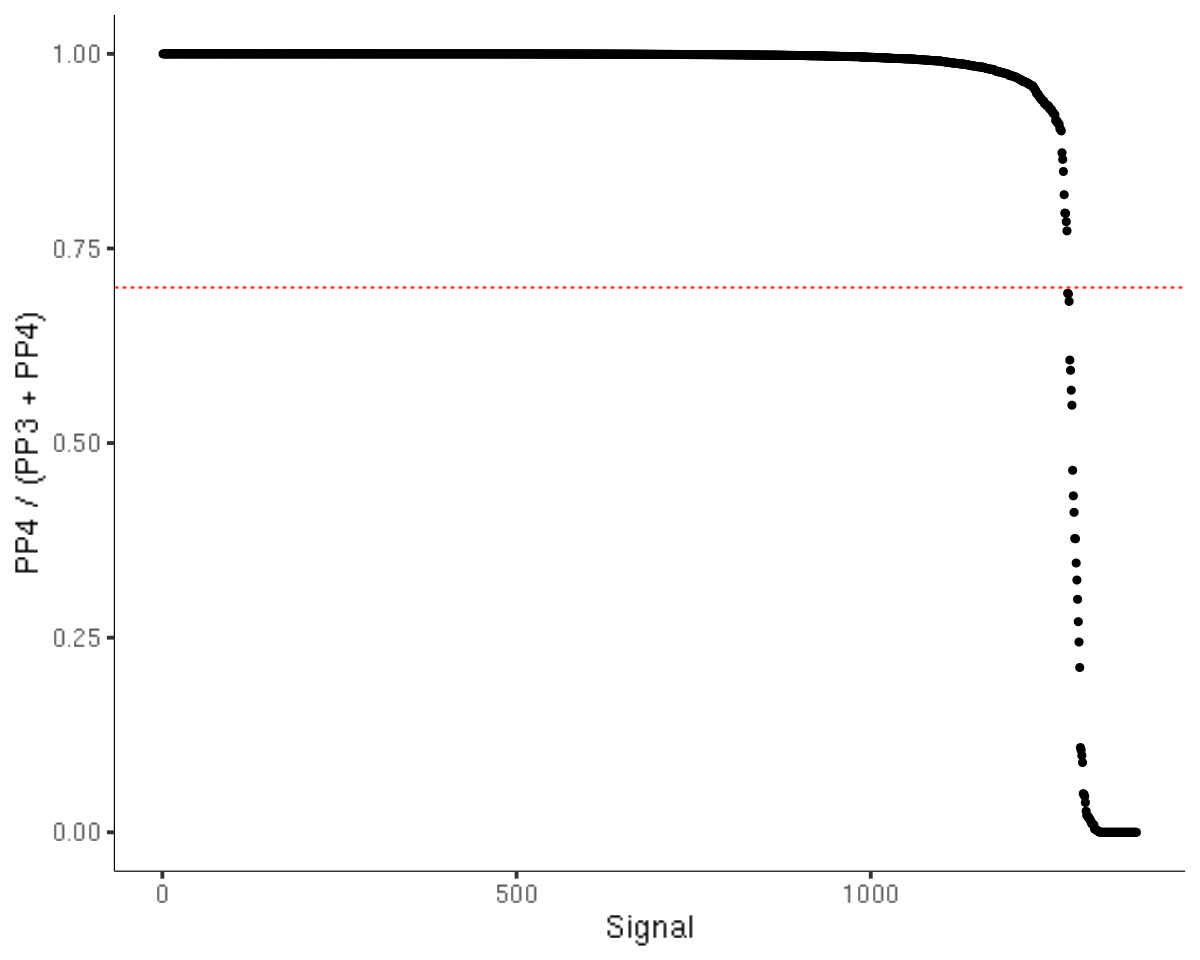

In [14]:
options(repr.plot.width=10, repr.plot.height=8)

coloc.res %>%
    dplyr::filter(PP.H3.abf + PP.H4.abf > 0.25) %>%
    dplyr::mutate(Coloc.Factor=PP.H4.abf / (PP.H3.abf + PP.H4.abf)) %>%
    dplyr::mutate(Rank=rank(-Coloc.Factor, ties.method="first")) %>%
    ggplot() +
    geom_point(aes(x=Rank, y=Coloc.Factor)) +
    geom_hline(aes(yintercept=0.7), lty=2, color="firebrick1") +
    xlab("Signal") + ylab("PP4 / (PP3 + PP4)") +
    ggplot_theme

In [15]:
colocalizing <- coloc.res %>%
    dplyr::filter(PP.H3.abf + PP.H4.abf > 0.25) %>%
    dplyr::mutate(Coloc.Factor=PP.H4.abf / (PP.H3.abf + PP.H4.abf)) %>%
    dplyr::filter(Coloc.Factor > 0.7) %>%
    dplyr::arrange(SNP, desc(Coloc.Factor))

In [16]:
length(unique(colocalizing$SNP))

[1] 781

In [17]:
gene.info <- read.table("/nfs/team282/data/gains_team282/gene_info_864_20412_hla.txt")

In [18]:
head(gene.info)

,seqnames,start,end,width,strand,source,type,score,phase,gene_id,⋯,transcript_source,transcript_biotype,tag,transcript_support_level,exon_number,exon_id,exon_version,protein_id,protein_version,ccds_id
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
ENSG00000230521,6,29887294,29888268,975,-,havana,gene,NA,NA,ENSG00000230521,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000225864,6,29722981,29723971,991,-,havana,gene,NA,NA,ENSG00000225864,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000227766,6,29942075,29943067,993,-,havana,gene,NA,NA,ENSG00000227766,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000237669,6,30006121,30007116,996,-,havana,gene,NA,NA,ENSG00000237669,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000271581,6,31356647,31357637,991,+,havana,gene,NA,NA,ENSG00000271581,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000285647,6,31367057,31376088,9032,+,havana,gene,NA,NA,ENSG00000285647,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [43]:
colocalizing %>%
    dplyr::group_by(SNP) %>%
    dplyr::summarize(Genes=length(union(Gene.1, Gene.2))) %>%
    dplyr::arrange(desc(Genes)) %>%
    head(n=20)

SNP,Genes
<chr>,<int>
rs4759187,9
rs1132812,8
rs7944394,7
rs3114489,6
rs56084453,6
rs7395319,6
rs17651507,5
rs2072505,5
rs2346781,5


,seqnames,start,end,width,strand,source,type,score,phase,gene_id,gene_version,gene_name,gene_source,gene_biotype
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>
ENSG00000135404,12,55725323,55729707,4385,-,ensembl_havana,gene,NA,NA,ENSG00000135404,11,CD63,ensembl_havana,protein_coding
ENSG00000135424,12,55684568,55716043,31476,-,ensembl_havana,gene,NA,NA,ENSG00000135424,17,ITGA7,ensembl_havana,protein_coding
ENSG00000135437,12,55720367,55724705,4339,+,ensembl_havana,gene,NA,NA,ENSG00000135437,9,RDH5,ensembl_havana,protein_coding
ENSG00000135441,12,55716037,55720087,4051,+,ensembl_havana,gene,NA,NA,ENSG00000135441,7,BLOC1S1,ensembl_havana,protein_coding
ENSG00000170439,12,55681678,55684611,2934,+,ensembl_havana,gene,NA,NA,ENSG00000170439,7,METTL7B,ensembl_havana,protein_coding
ENSG00000258056,12,55729104,55730852,1749,+,havana,gene,NA,NA,ENSG00000258056,2,AC009779.3,havana,lncRNA
ENSG00000258311,12,55716036,55724703,8668,+,havana,gene,NA,NA,ENSG00000258311,5,AC009779.4,havana,protein_coding
ENSG00000065357,12,55927319,55954027,26709,+,ensembl_havana,gene,NA,NA,ENSG00000065357,20,DGKA,ensembl_havana,protein_coding
ENSG00000258921,12,55638912,55659795,20884,-,havana,gene,NA,NA,ENSG00000258921,1,AC009779.6,havana,lncRNA


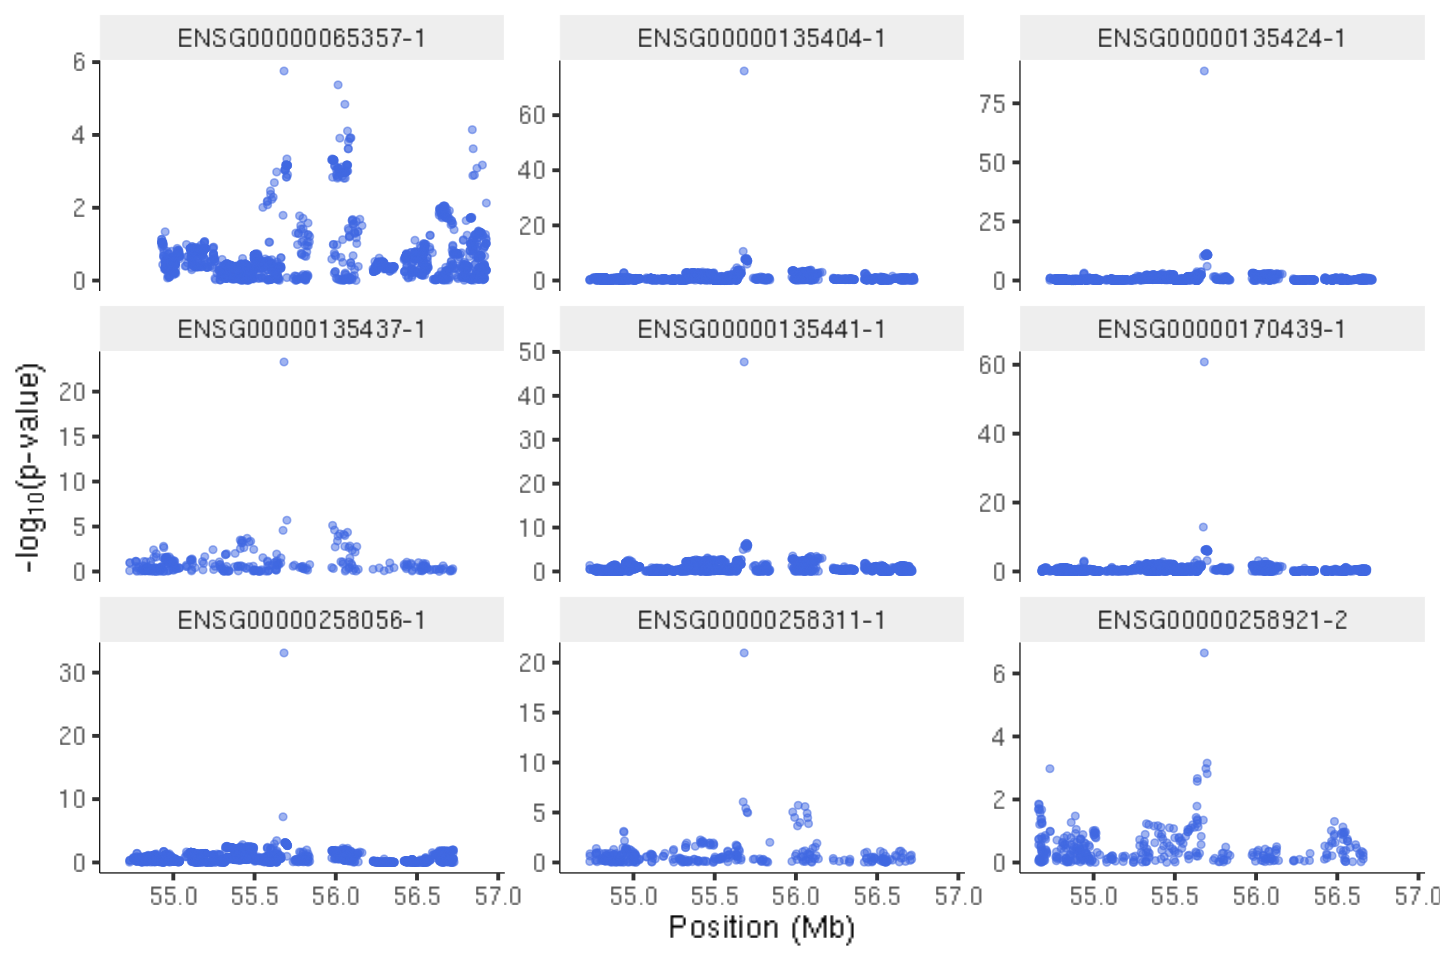

In [44]:
snp.coloc <- colocalizing %>%
    dplyr::filter(SNP == "rs4759187")

genes <- union(
    paste0(snp.coloc$Gene.1, "-", snp.coloc$eQTL.Signal.1),
    paste0(snp.coloc$Gene.2, "-", snp.coloc$eQTL.Signal.2)
)

gene.info[union(snp.coloc$Gene.1, snp.coloc$Gene.2),1:14]

options(repr.plot.width=12, repr.plot.height=8)

cis.eqtl.summary %>%
    dplyr::filter(ID %in% genes) %>%
    ggplot() +
    geom_point(aes(x=Position / 10^6, y=-log10(P_Value)), alpha=0.5, color="royalblue") +
    facet_wrap(ID ~ ., scales="free_y") +
    xlab("Position (Mb)") + ylab(bquote("-log"[10]*"(p-value)")) +
    ggplot_theme

,seqnames,start,end,width,strand,source,type,score,phase,gene_id,gene_version,gene_name,gene_source,gene_biotype
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>
ENSG00000211751,7,142791694,142793368,1675,+,havana,gene,NA,NA,ENSG00000211751,9,TRBC1,havana,TR_C_gene
ENSG00000211767,7,142796847,142796895,49,+,havana,gene,NA,NA,ENSG00000211767,1,TRBJ2-3,havana,TR_J_gene
ENSG00000281958,7,142788225,142788275,51,+,havana,gene,NA,NA,ENSG00000281958,1,TRBJ1-4,havana,TR_J_gene
ENSG00000282173,7,142788498,142788547,50,+,havana,gene,NA,NA,ENSG00000282173,1,TRBJ1-5,havana,TR_J_gene
ENSG00000282420,7,142787017,142787064,48,+,havana,gene,NA,NA,ENSG00000282420,1,TRBJ1-2,havana,TR_J_gene
ENSG00000282780,7,142788988,142789040,53,+,havana,gene,NA,NA,ENSG00000282780,1,TRBJ1-6,havana,TR_J_gene


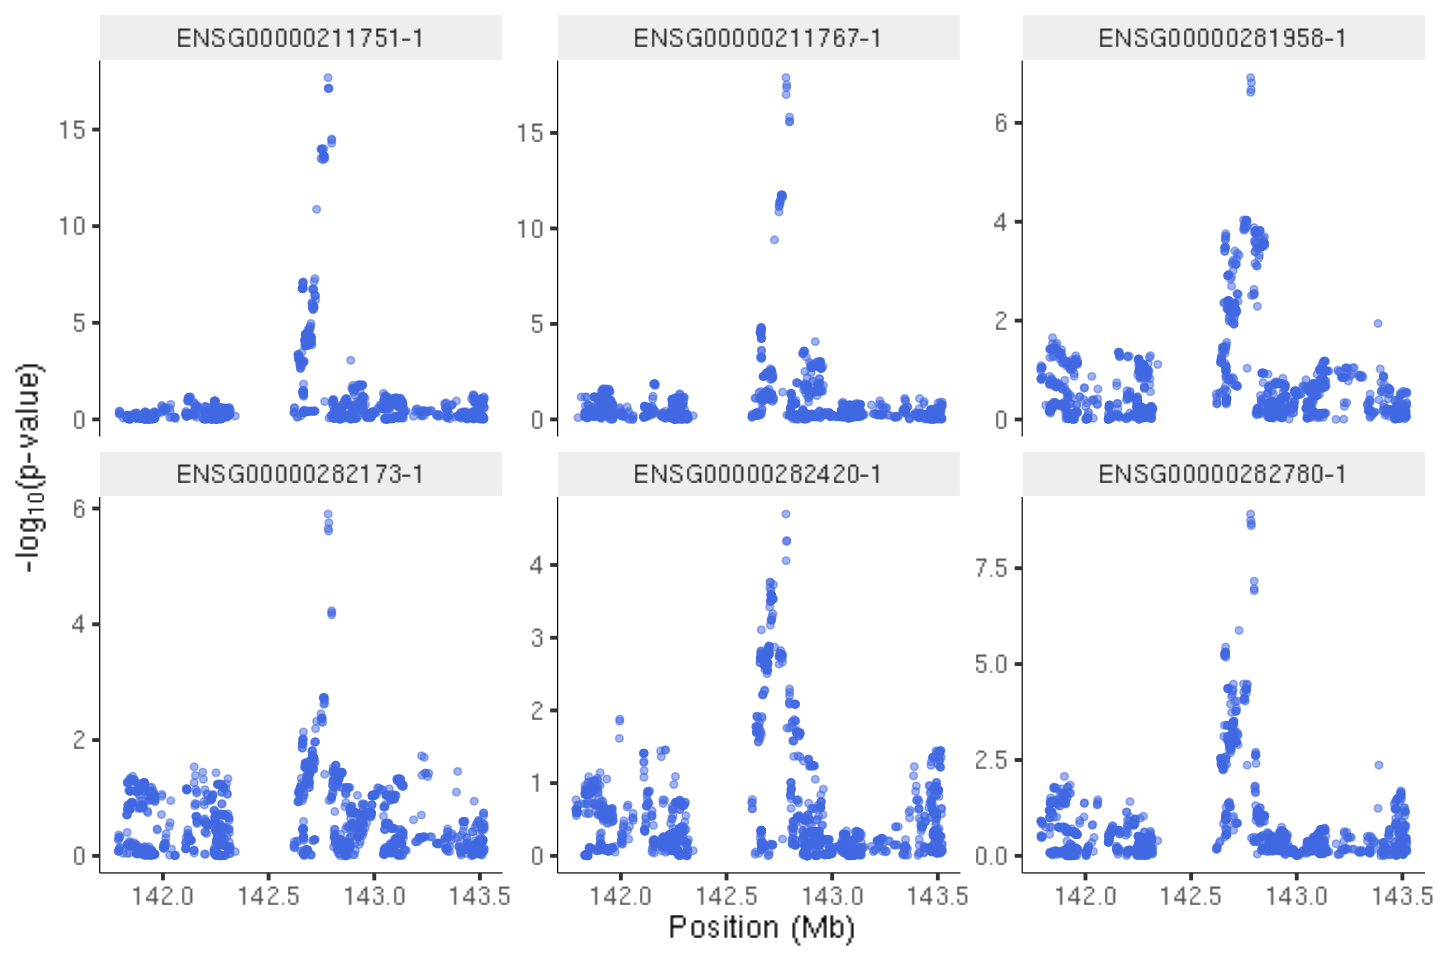

In [65]:
snp.coloc <- colocalizing %>%
    dplyr::filter(SNP == "rs3114489")

genes <- union(
    paste0(snp.coloc$Gene.1, "-", snp.coloc$eQTL.Signal.1),
    paste0(snp.coloc$Gene.2, "-", snp.coloc$eQTL.Signal.2)
)

gene.info[union(snp.coloc$Gene.1, snp.coloc$Gene.2),1:14]

options(repr.plot.width=12, repr.plot.height=8)

cis.eqtl.summary %>%
    dplyr::filter(ID %in% genes) %>%
    ggplot() +
    geom_point(aes(x=Position / 10^6, y=-log10(P_Value)), alpha=0.5, color="royalblue") +
    facet_wrap(ID ~ ., scales="free_y") +
    xlab("Position (Mb)") + ylab(bquote("-log"[10]*"(p-value)")) +
    ggplot_theme

ggsave("01_Colocalization/results/cis_eqtl_tcr.svg", width=12, height=8)